In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

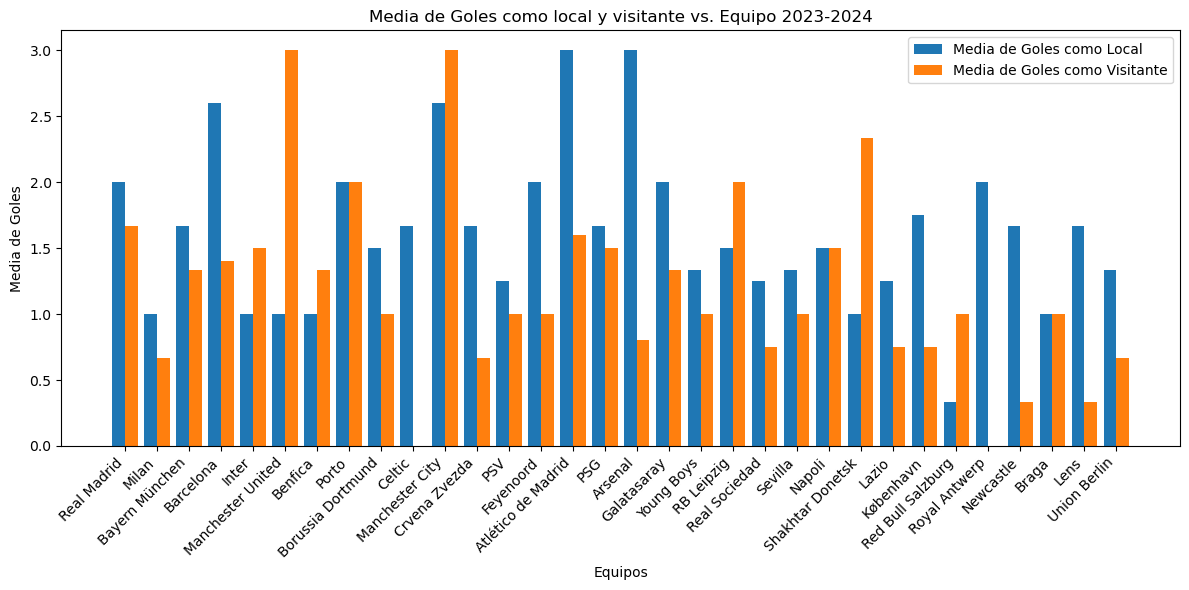

In [80]:
import json

df = pd.read_csv('dataframe/champions_23_24.csv')

with open('dataframe/id_equipo.json') as f:
    equipo_id_map = json.load(f)

# Calcular la media de goles como local y visitante para cada equipo
media_goles_local = df.groupby('Local')['GolesLocal'].mean()
media_goles_visitante = df.groupby('Visitante')['GolesVisitante'].mean()

# Obtener la lista de equipos
equipos = sorted(set(df['Local']).union(set(df['Visitante'])))
ids_equipos = {str(value): key for key, value in equipo_id_map.items()}

# Obtener los valores de la media de goles como local y visitante para cada equipo
valores_media_goles_local = [media_goles_local.get(equipo, 0) for equipo in equipos]
valores_media_goles_visitante = [media_goles_visitante.get(equipo, 0) for equipo in equipos]

# Configurar el gráfico de barras
x = range(len(equipos))
ancho_barra = 0.4

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(x, valores_media_goles_local, width=ancho_barra, label='Media de Goles como Local')
plt.bar([i + ancho_barra for i in x], valores_media_goles_visitante, width=ancho_barra, label='Media de Goles como Visitante')

# Configurar las etiquetas del eje x
plt.xlabel('Equipos')
plt.ylabel('Media de Goles')
plt.title('Media de Goles como local y visitante vs. Equipo 2023-2024')
plt.xticks([i + ancho_barra / 2 for i in x], [ids_equipos.get(str(equipo), 'Sin ID') for equipo in equipos], rotation=45, ha='right')

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

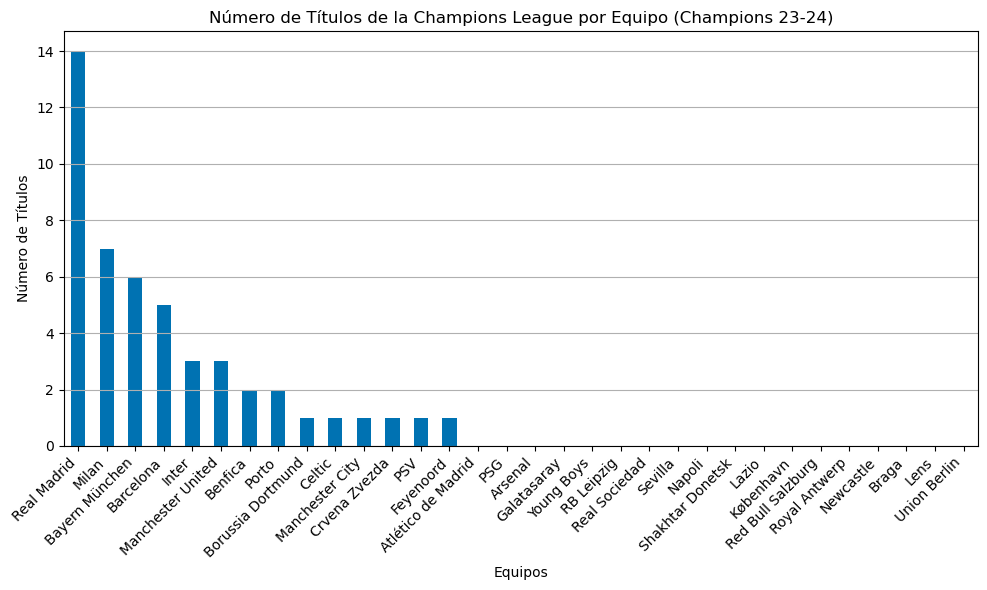

In [81]:
# Cargar el dataframe de equipos
df_equipos = pd.read_csv('dataframe/df_equipo.csv')

# Filtrar los equipos que participaron en la Champions League 2023-2024
equipos_champions_23_24 = df['Local'].unique().tolist() + df['Visitante'].unique().tolist()

# Convertir la lista de nombres de equipos a un conjunto para eliminar duplicados y luego volver a convertirlo a una lista
equipos = list(set(equipos_champions_23_24))

# Filtrar el dataframe de equipos
df_equipos_champions_23_24 = df_equipos[df_equipos['idEquipo'].isin(equipos)]

# Obtener el número de títulos de cada equipo
titulos_por_equipo = df_equipos_champions_23_24.set_index('Nombre')['Títulos']

#Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
titulos_por_equipo.plot(kind='bar', color='#0072B2')
plt.title('Número de Títulos de la Champions League por Equipo (Champions 23-24)')
plt.xlabel('Equipos')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [82]:
data = pd.read_csv('dataframe/champions.csv')

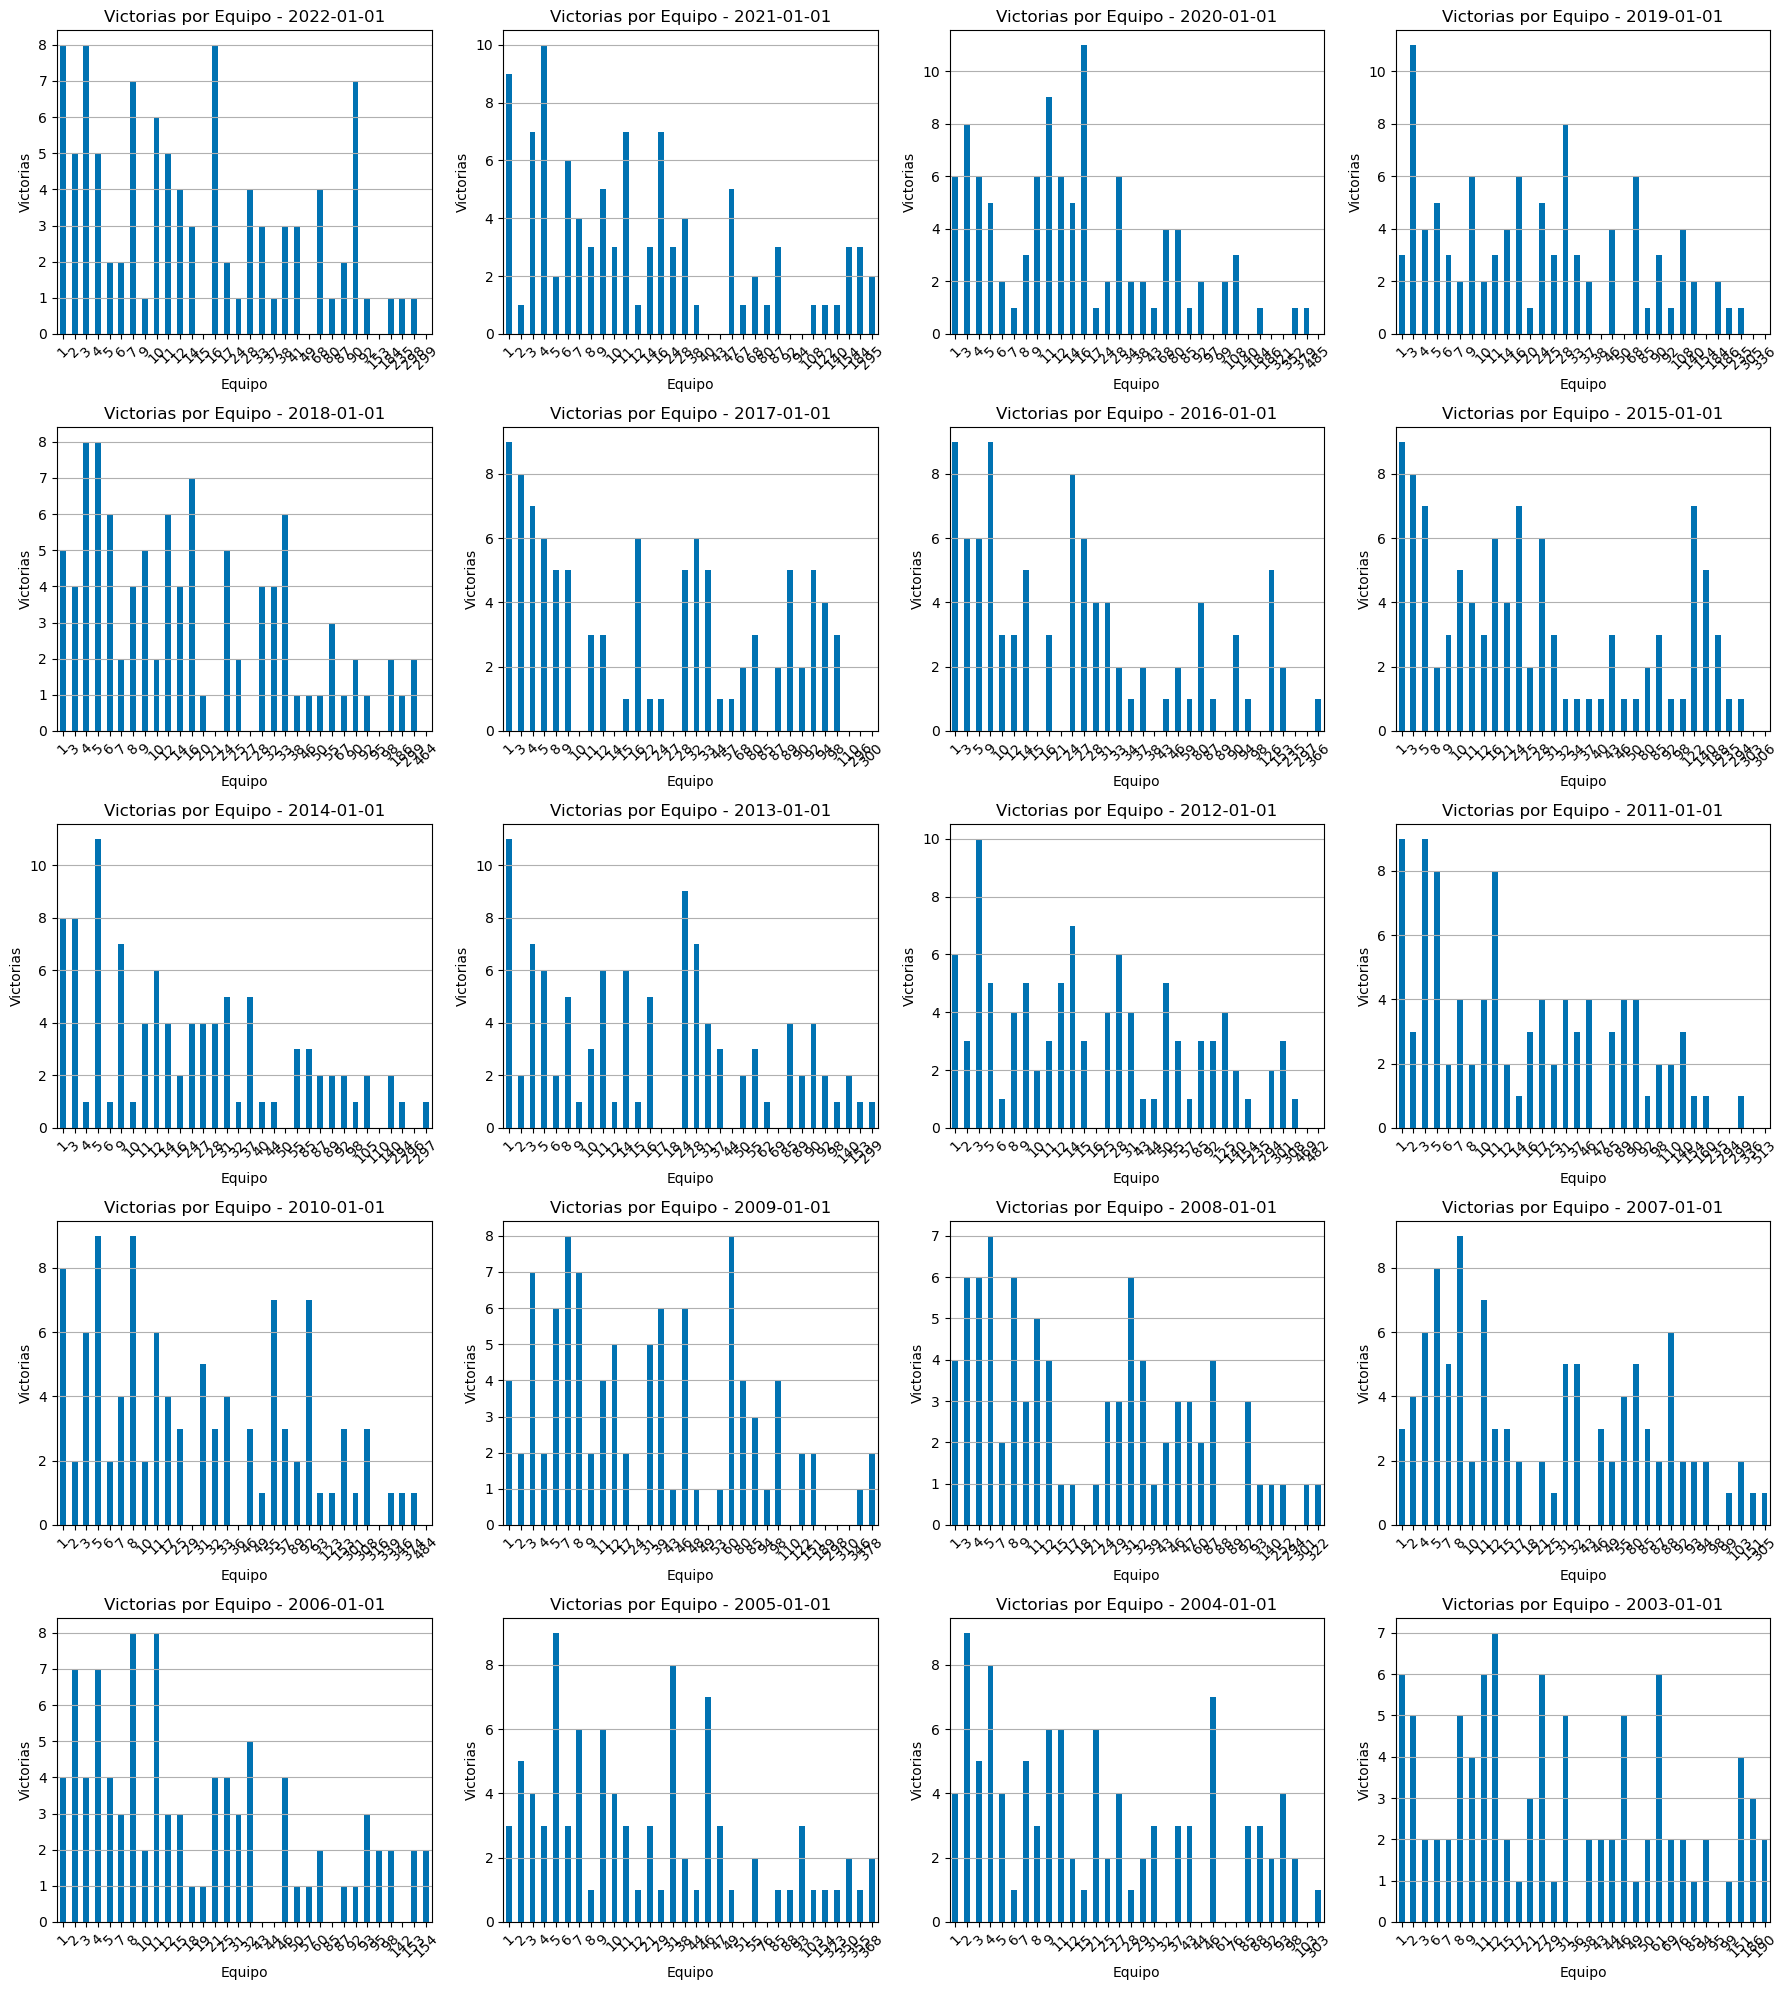

In [83]:
# Obtener el número de temporadas
num_temporadas = len(data['Temporada'].unique())

num_filas = (num_temporadas + 2) // 4

# Definir el tamaño de cada gráfico
fig, axes = plt.subplots(nrows=num_filas, ncols=4, figsize=(18, 4*num_filas))

# Iterar sobre cada temporada y crear un histograma para el número de victorias de cada equipo
for i, temporada in enumerate(data['Temporada'].unique()):
    temporada_data = data[data['Temporada'] == temporada]
    victorias_por_equipo = temporada_data.groupby('Local')['VictoriaLocal'].sum() + temporada_data.groupby('Visitante')['VictoriaVisitante'].sum()
    
    # Obtener la fila y la columna correspondientes en la matriz de subtramas
    fila = i // 4
    columna = i % 4
    
    # Crear el histograma en la subtrama correspondiente
    victorias_por_equipo.plot(kind='bar', ax=axes[fila, columna], color='#0072B2')
    axes[fila, columna].set_title(f'Victorias por Equipo - {temporada}')
    axes[fila, columna].set_xlabel('Equipo')
    axes[fila, columna].set_ylabel('Victorias')
    axes[fila, columna].tick_params(axis='x', rotation=45)
    axes[fila, columna].grid(axis='y')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la tabla de histogramas
plt.show()


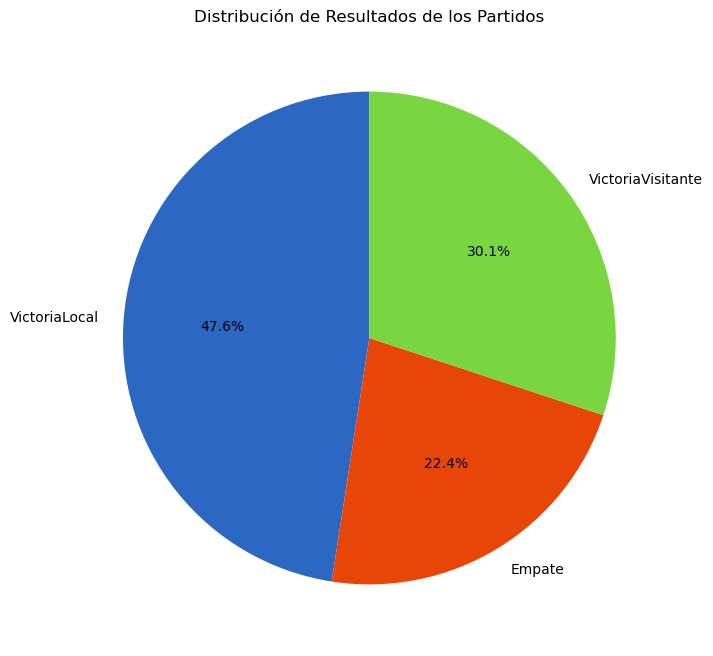

In [97]:
#Gráfico circular de resultados de los partidos
match_outcomes = data[['VictoriaLocal', 'Empate', 'VictoriaVisitante']].sum()
match_outcomes.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['#2d67c4', '#e84509', '#7ad640'])
plt.title('Distribución de Resultados de los Partidos')
plt.ylabel('')
plt.show()

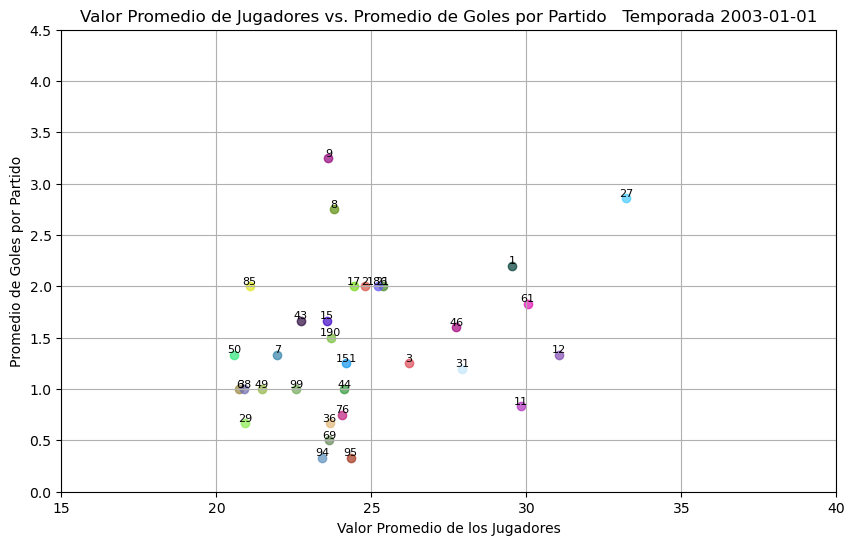

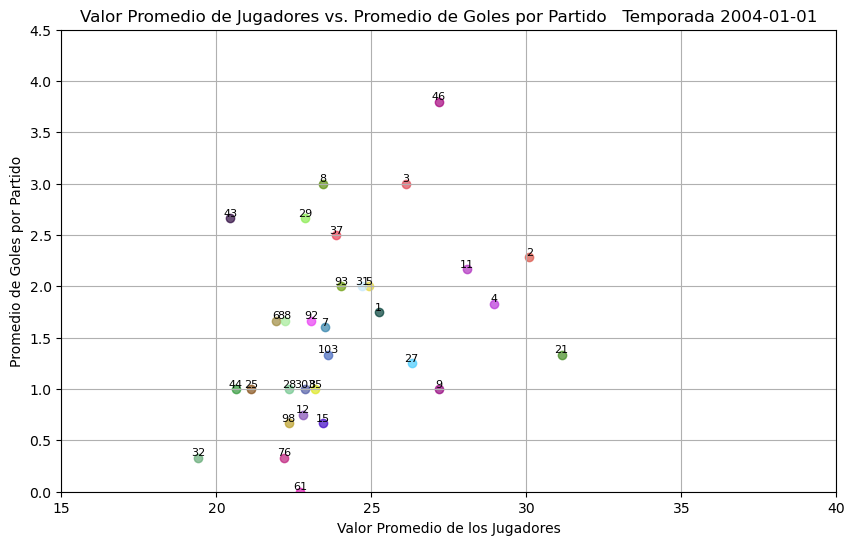

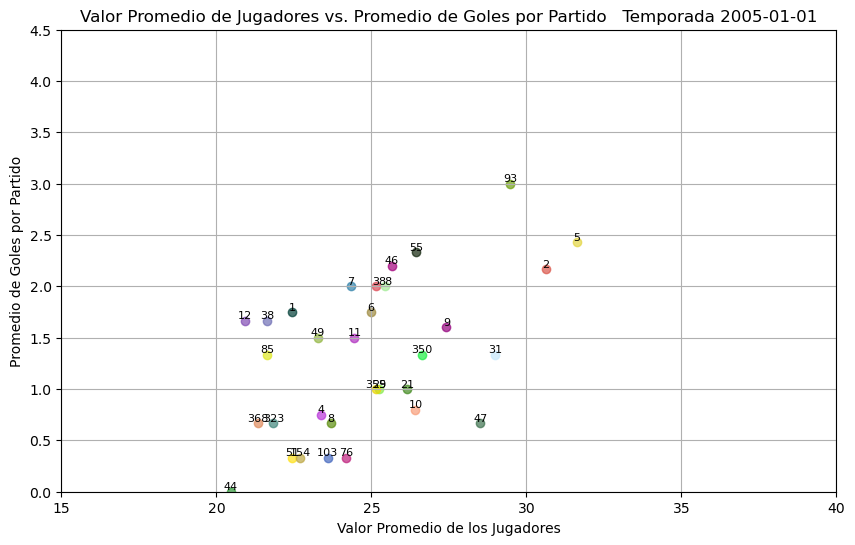

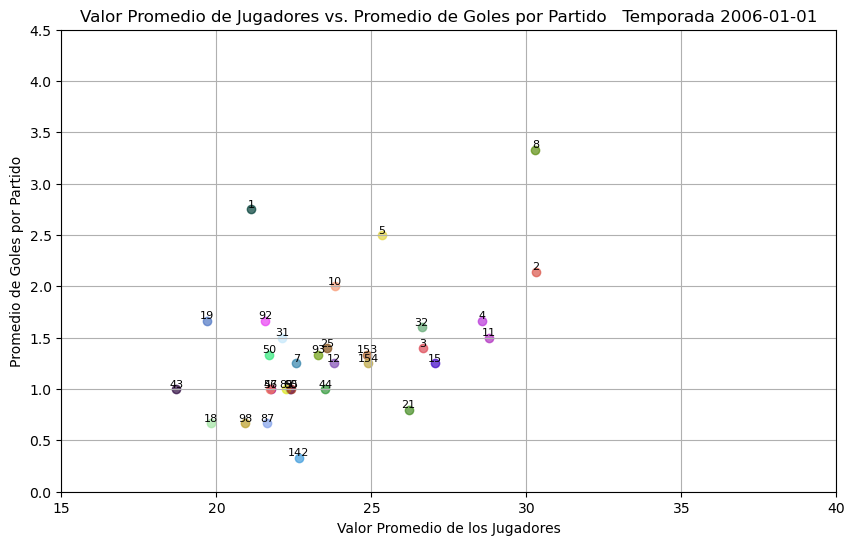

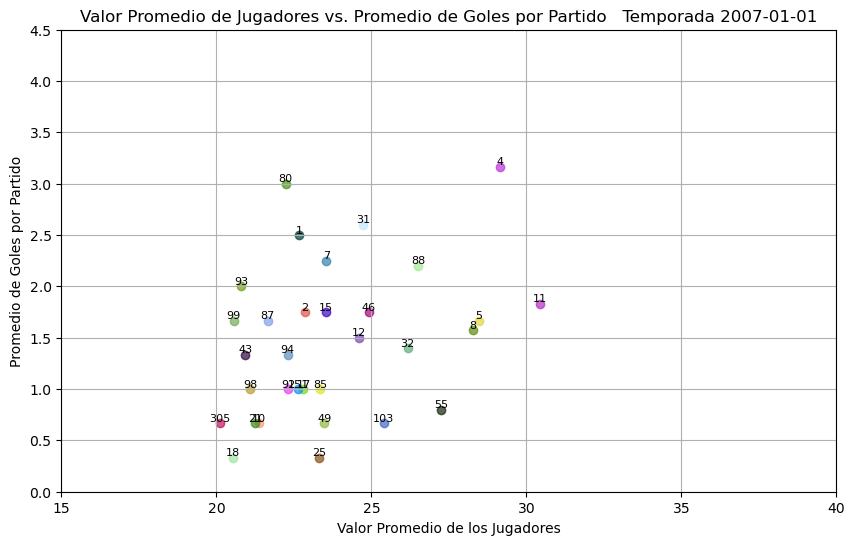

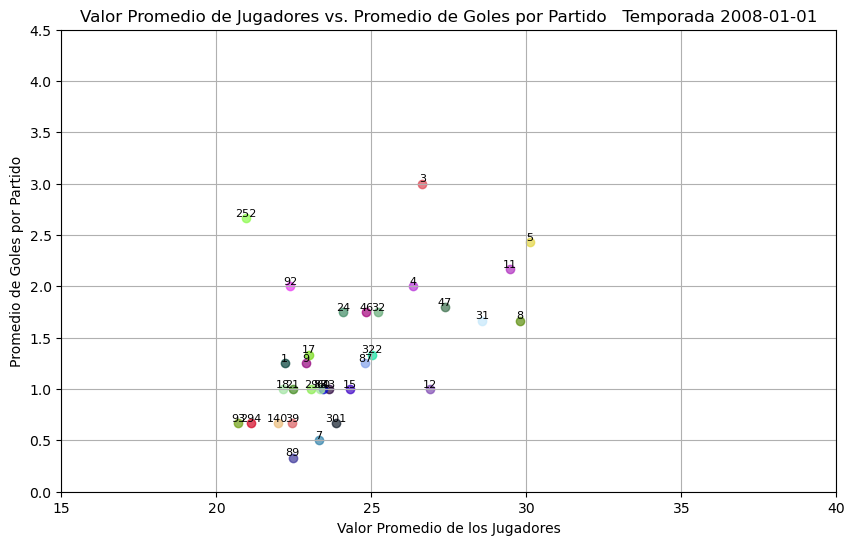

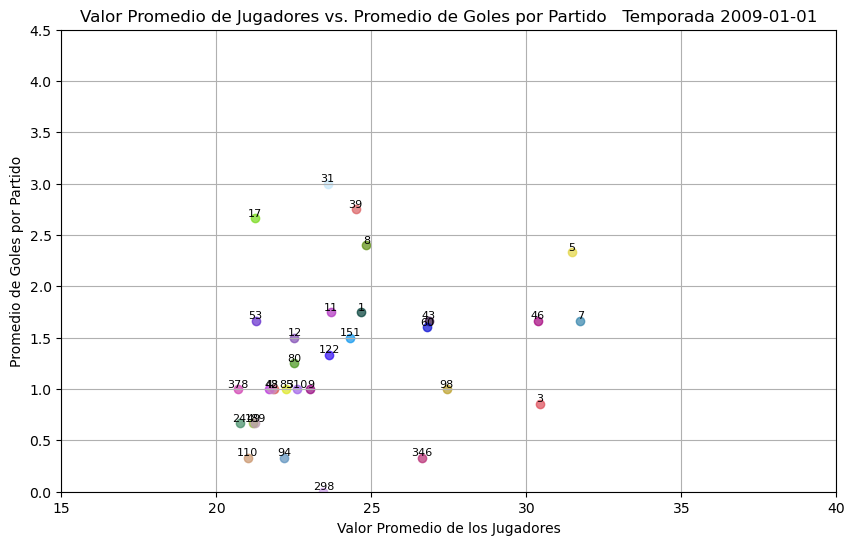

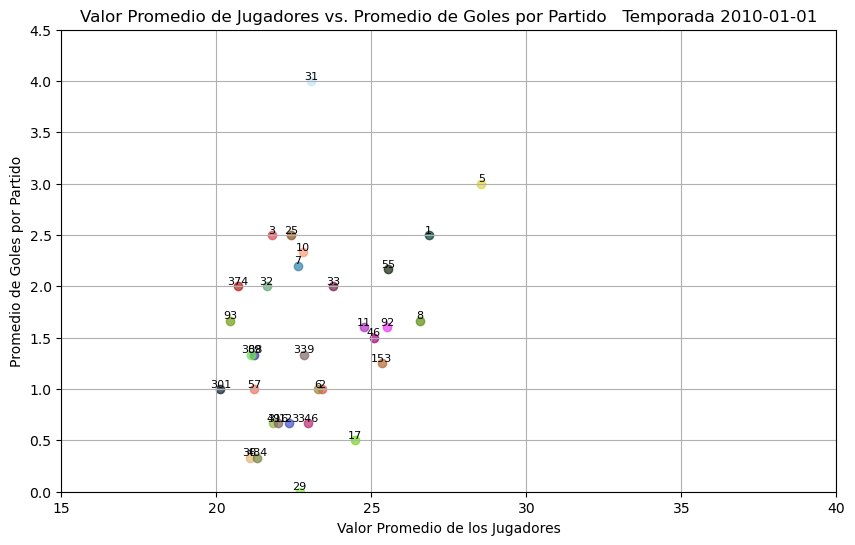

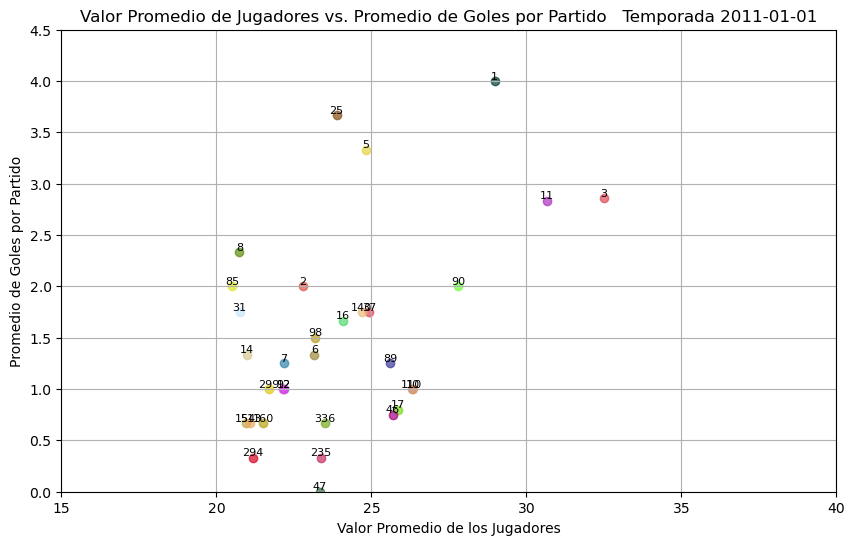

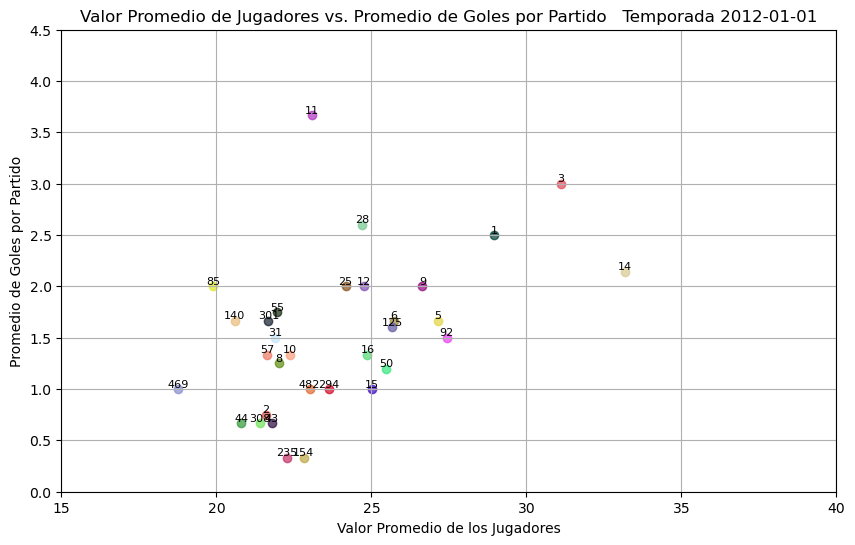

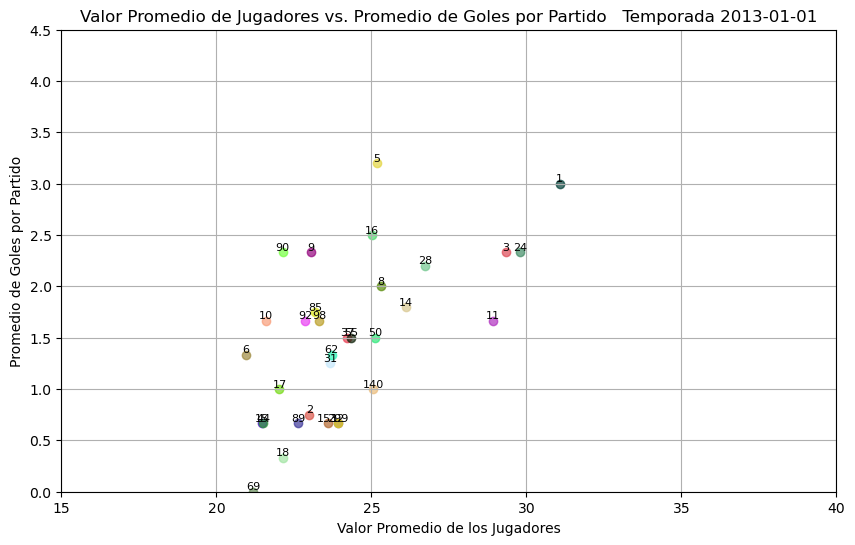

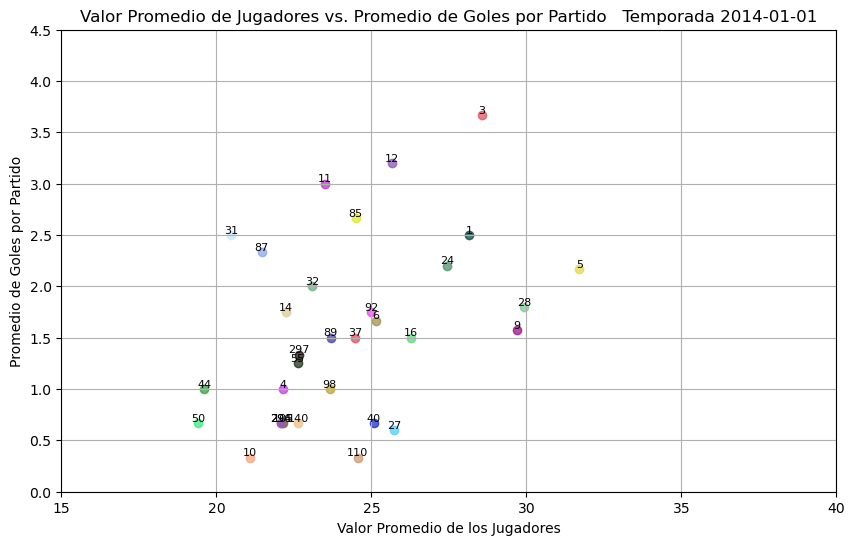

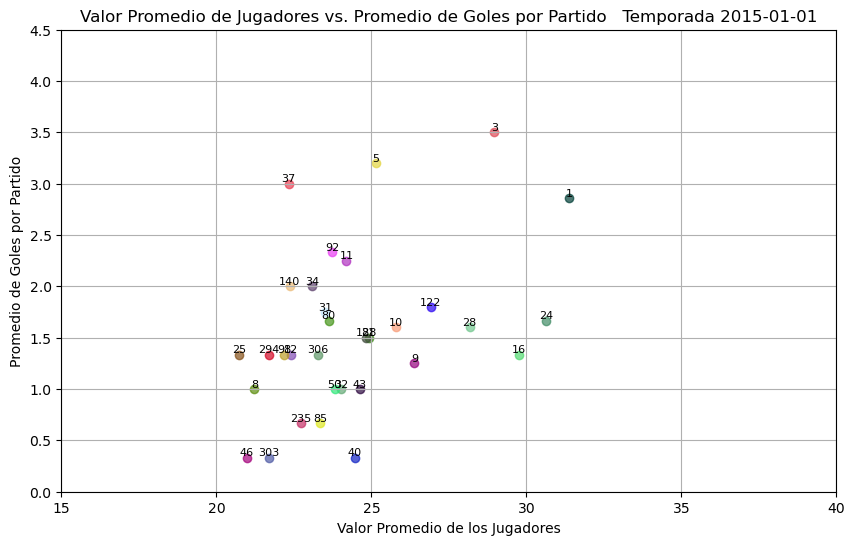

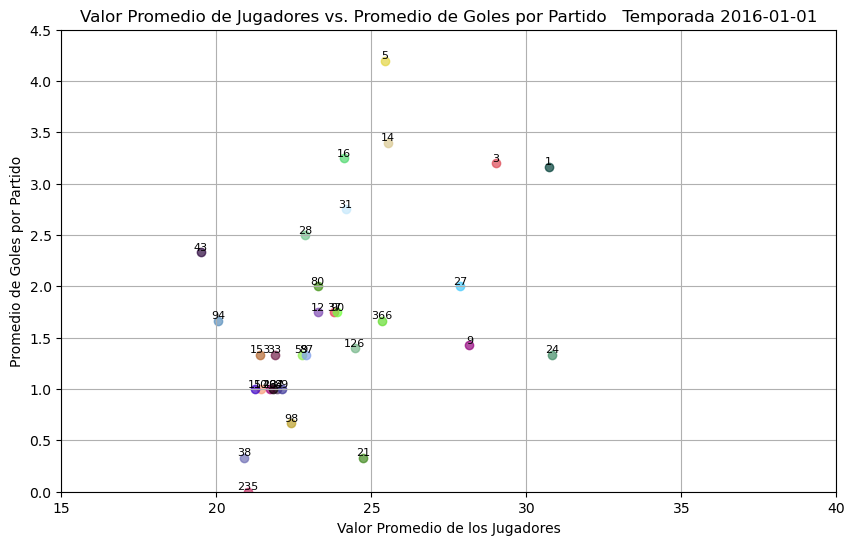

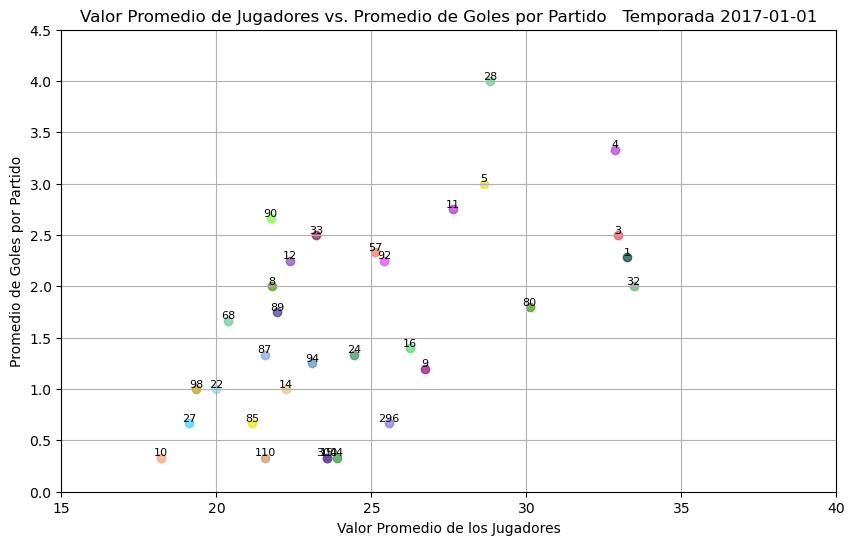

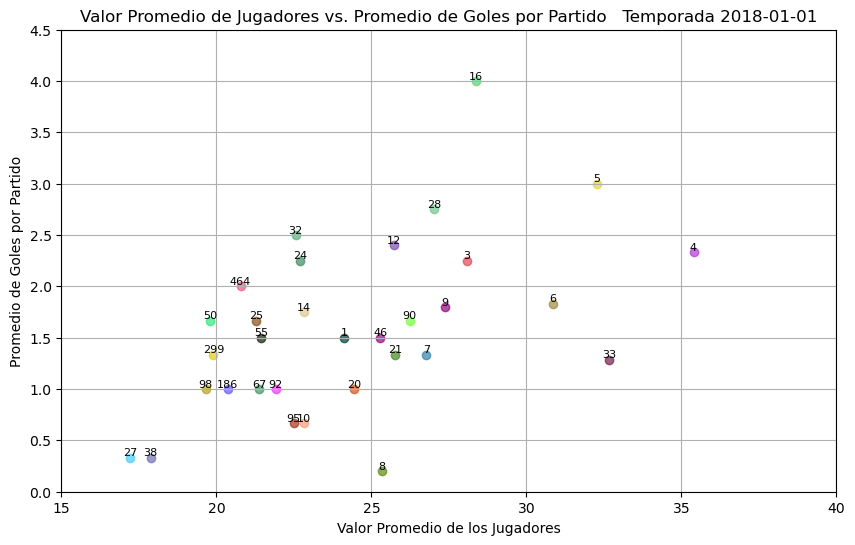

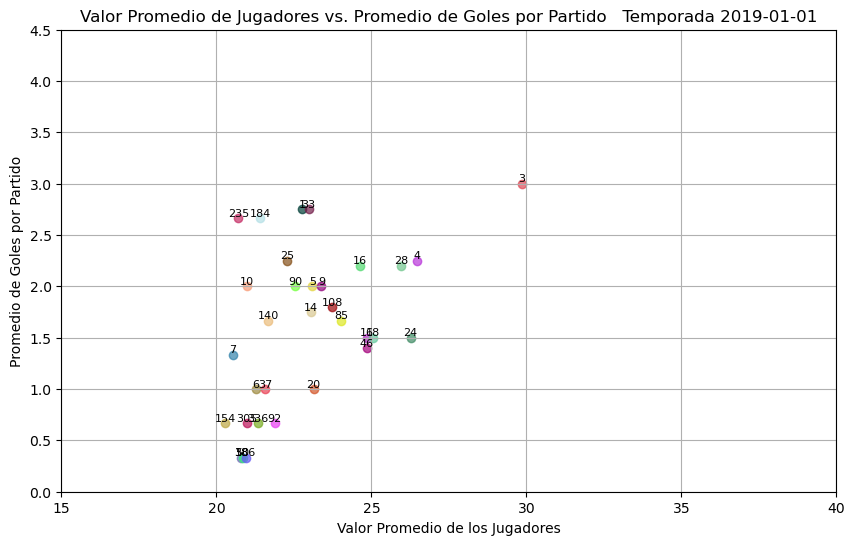

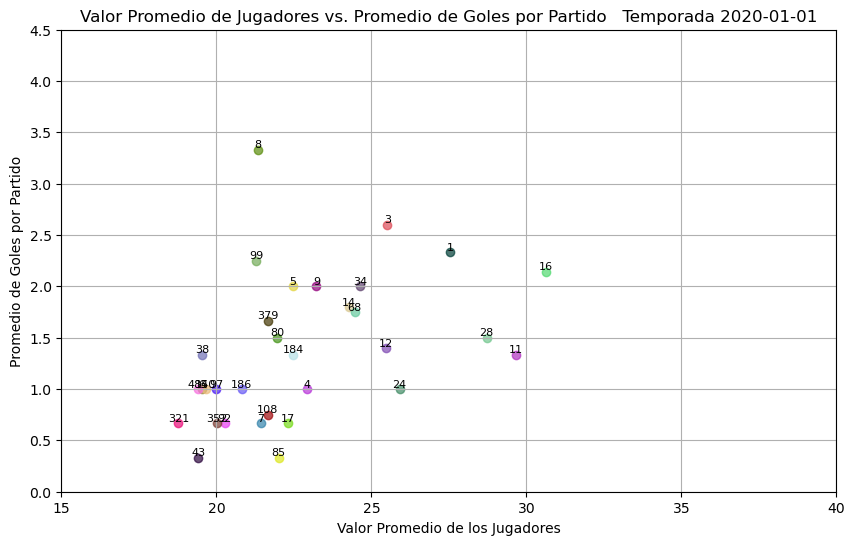

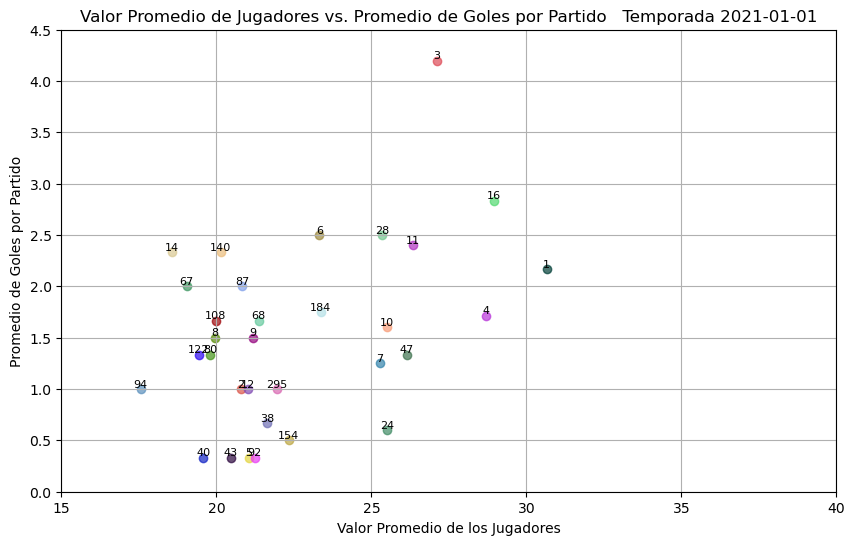

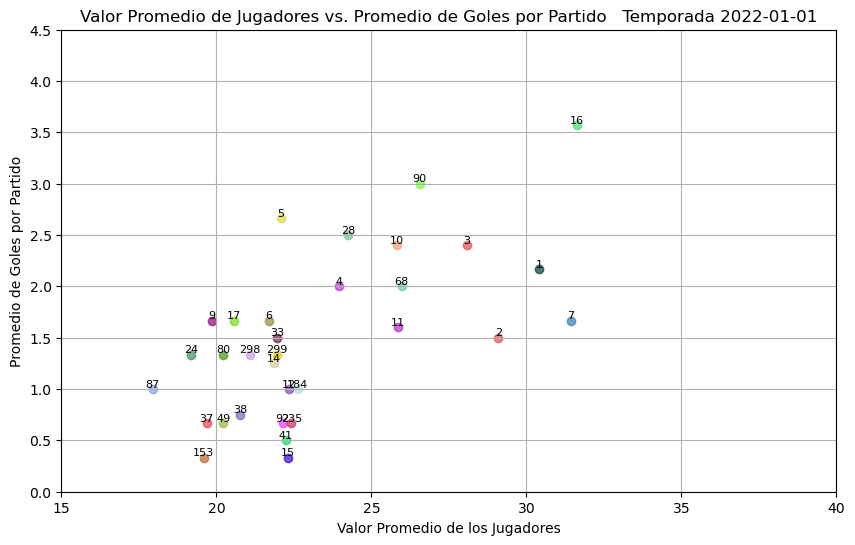

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular el promedio de goles por partido para cada equipo en cada temporada
promedio_goles_por_equipo_temporada = data.groupby(['Temporada', 'Local'])['GolesLocal'].mean().reset_index()
promedio_goles_visitante_por_equipo_temporada = data.groupby(['Temporada', 'Visitante'])['GolesVisitante'].mean().reset_index()
promedio_goles_por_equipo_temporada = pd.concat([promedio_goles_por_equipo_temporada, promedio_goles_visitante_por_equipo_temporada], ignore_index=True)
promedio_goles_por_equipo_temporada = promedio_goles_por_equipo_temporada.groupby(['Temporada', 'Local'])['GolesLocal'].mean().reset_index()
promedio_goles_por_equipo_temporada.rename(columns={'Local': 'Equipo'}, inplace=True)

# Obtener una lista de colores únicos para cada equipo
colores = np.random.rand(len(data['Local'].unique()), 3)  # Genera colores aleatorios en formato RGB

# Obtener una lista ordenada de nombres de equipos únicos
equipos_unicos = sorted(data['Local'].unique())

# Obtener una lista de temporadas únicas
temporadas_unicas = sorted(data['Temporada'].unique())

# Lista para almacenar nombres de equipos y colores
equipos_legend = []

# Crear un diagrama de dispersión para cada temporada
for temporada in temporadas_unicas:
    plt.figure(figsize=(10, 6))
    plt.title(f'Valor Promedio de Jugadores vs. Promedio de Goles por Partido   Temporada {temporada}')
    plt.xlabel('Valor Promedio de los Jugadores')
    plt.ylabel('Promedio de Goles por Partido')
    plt.grid(True)

    plt.xlim(15, 40)  # Establecer límites del eje x
    plt.ylim(0, 4.5)  # Establecer límites del eje y
    
    for equipo, color in zip(equipos_unicos, colores):
        equipo_data = data[((data['Local'] == equipo) | (data['Visitante'] == equipo)) & (data['Temporada'] == temporada)]
        valor_promedio_jugadores = equipo_data['1_MediaJugadores'].mean()
        promedio_goles = promedio_goles_por_equipo_temporada[(promedio_goles_por_equipo_temporada['Temporada'] == temporada) & (promedio_goles_por_equipo_temporada['Equipo'] == equipo)]
        if not promedio_goles.empty:
            promedio_goles = promedio_goles['GolesLocal'].values[0]
            plt.scatter(valor_promedio_jugadores, promedio_goles, label=equipo, alpha=0.7, color=color)
            plt.text(valor_promedio_jugadores, promedio_goles, equipo, fontsize=8, ha='center', va='bottom')
            if equipo not in equipos_legend:  # Añadir el equipo a la lista si aún no está presente
                equipos_legend.append(equipo)


plt.show()

